In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sarcasm_nonsarcasm_features.csv', sep = ',')

In [ ]:
data.head()

,num_nouns,num_adjectives,num_verbs,num_one_letter_words,num_two_letter_words,num_longer_words,difficult_word_count,wrong_word_count,stop_word_count,entropy,lex_diversity,flesch_score,dchall_score,label
0,4,2,1,0,1,7,6,1,1,4.033908,1.0,121.22,0.05,1
1,5,3,2,0,2,11,8,0,3,4.131136,1.0,-47.99,19.48,0
2,2,1,1,1,0,6,5,0,1,4.010032,1.0,121.22,19.48,0
3,3,0,3,0,1,7,6,0,2,3.894052,1.0,121.22,0.05,1
4,2,1,3,0,1,8,7,0,1,3.983295,1.0,-47.99,19.48,1


In [ ]:
import numpy as np
data_array = np.asarray(data)

In [ ]:
features =  data_array[:,0:13]
labels = data_array[:,13]

In [ ]:
features

array([[ 4.0000e+00,  2.0000e+00,  1.0000e+00, ...,  1.0000e+00,
         1.2122e+02,  5.0000e-02],
       [ 5.0000e+00,  3.0000e+00,  2.0000e+00, ...,  1.0000e+00,
        -4.7990e+01,  1.9480e+01],
       [ 2.0000e+00,  1.0000e+00,  1.0000e+00, ...,  1.0000e+00,
         1.2122e+02,  1.9480e+01],
       ...,
       [ 4.0000e+00,  2.0000e+00,  1.0000e+00, ...,  1.0000e+00,
        -4.7990e+01,  1.9480e+01],
       [ 3.0000e+00,  1.0000e+00,  3.0000e+00, ...,  1.0000e+00,
         1.2122e+02,  5.0000e-02],
       [ 4.0000e+00,  0.0000e+00,  0.0000e+00, ...,  1.0000e+00,
         1.2122e+02,  5.0000e-02]])

In [ ]:
labels

array([1., 0., 0., ..., 0., 1., 1.])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(45790, 13) (11448, 13) (45790,) (11448,)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.svm import SVC
model_SVM = SVC()
model_SVM.fit(x_train, y_train)
y_pred_SVM = model_SVM.predict(x_test)
print("SVM")
print("Accuracy score =", accuracy_score(y_test, y_pred_SVM))
print(metrics.classification_report(y_test, y_pred_SVM))

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=2, random_state=0)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("random")
print("Accuracy score =", accuracy_score(y_test, y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)
print("Logistic Regression")
print("Accuracy score =", accuracy_score(y_test, y_pred_LR))
print(metrics.classification_report(y_test, y_pred_LR ))

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(x_train,y_train)
y_pred_KNN = neigh.predict(x_test)
print("KNN")
print("Accuracy score =", accuracy_score(y_test, y_pred_KNN))
print(metrics.classification_report(y_test, y_pred_KNN ))

from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train,y_train)
y_pred_naive = naive.predict(x_test)
print("Naive Bayes")
print("Accuracy score =", accuracy_score(y_test, y_pred_naive))
print(metrics.classification_report(y_test, y_pred_naive ))

from sklearn.ensemble import GradientBoostingClassifier
gradient = GradientBoostingClassifier(n_estimators=100,max_depth=None,min_samples_split=2, random_state=0)
gradient.fit(x_train,y_train)
y_pred_gradient = gradient.predict(x_test)
print("Gradient Boosting")
print("Accuracy score =", accuracy_score(y_test, y_pred_gradient))
print(metrics.classification_report(y_test, y_pred_gradient ))

    
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(x_train,y_train)
y_pred_decision = decision.predict(x_test)
print("Decision Tree")
print("Accuracy score =", accuracy_score(y_test, y_pred_decision))
print(metrics.classification_report(y_test, y_pred_decision ))

SVM
Accuracy score = 0.67479035639413
              precision    recall  f1-score   support

         0.0       0.68      0.71      0.69      5953
         1.0       0.67      0.64      0.65      5495

    accuracy                           0.67     11448
   macro avg       0.67      0.67      0.67     11448
weighted avg       0.67      0.67      0.67     11448

random
Accuracy score = 0.9374563242487771
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      5953
         1.0       0.94      0.93      0.93      5495

    accuracy                           0.94     11448
   macro avg       0.94      0.94      0.94     11448
weighted avg       0.94      0.94      0.94     11448



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy score = 0.6926100628930818
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70      5953
         1.0       0.68      0.68      0.68      5495

    accuracy                           0.69     11448
   macro avg       0.69      0.69      0.69     11448
weighted avg       0.69      0.69      0.69     11448

KNN
Accuracy score = 0.7454577218728162
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      5953
         1.0       0.73      0.75      0.74      5495

    accuracy                           0.75     11448
   macro avg       0.75      0.75      0.75     11448
weighted avg       0.75      0.75      0.75     11448

Naive Bayes
Accuracy score = 0.6413347309573725
              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65      5953
         1.0       0.62      0.64      0.63      5495

    accuracy                          

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_split=2, random_state=0)
clf2 = GradientBoostingClassifier(n_estimators=100,max_depth=None,min_samples_split=2, random_state=0)
clf3 = DecisionTreeClassifier()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

eclf.fit(x_train,y_train)
y_pred_decision = eclf.predict(x_test)
print("Ensamble Classifier")
print("Accuracy score =", accuracy_score(y_test, y_pred_decision))
print(metrics.classification_report(y_test, y_pred_decision ))


Ensamble Classifier
Accuracy score = 0.9295946890286513
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      5953
         1.0       0.93      0.92      0.93      5495

    accuracy                           0.93     11448
   macro avg       0.93      0.93      0.93     11448
weighted avg       0.93      0.93      0.93     11448



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
# define the keras model
model = Sequential()
model.add(Dense(8, input_dim=13, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(2, activation='softmax'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1

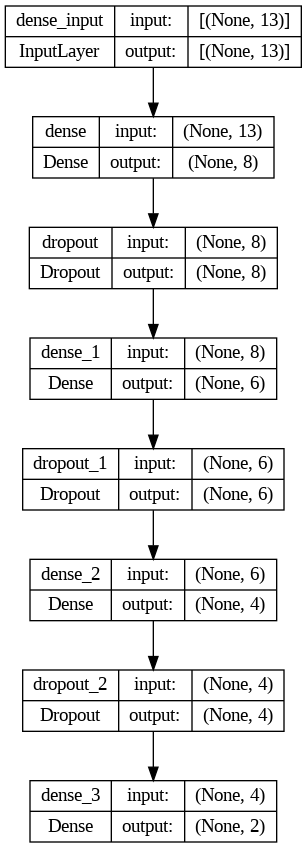

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import tensorflow as tf
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [ ]:
# fit the keras model on the dataset
model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=1000, batch_size=8, verbose =1)


Epoch 1/1000
5724/5724 [==============================] - 28s 4ms/step - loss: 0.7307 - accuracy: 0.5357 - val_loss: 0.6668 - val_accuracy: 0.5735
Epoch 2/1000
5724/5724 [==============================] - 16s 3ms/step - loss: 0.6508 - accuracy: 0.6198 - val_loss: 0.6308 - val_accuracy: 0.6488
Epoch 3/1000
5724/5724 [==============================] - 15s 3ms/step - loss: 0.6364 - accuracy: 0.6361 - val_loss: 0.6283 - val_accuracy: 0.6499
Epoch 4/1000
5724/5724 [==============================] - 16s 3ms/step - loss: 0.6143 - accuracy: 0.6642 - val_loss: 0.5963 - val_accuracy: 0.6839
Epoch 5/1000
5724/5724 [==============================] - 16s 3ms/step - loss: 0.6029 - accuracy: 0.6783 - val_loss: 0.5891 - val_accuracy: 0.6947
Epoch 6/1000
5724/5724 [==============================] - 15s 3ms/step - loss: 0.5982 - accuracy: 0.6816 - val_loss: 0.5934 - val_accuracy: 0.6879
Epoch 7/1000
5724/5724 [==============================] - 14s 3ms/step - loss: 0.5929 - accuracy: 0.6855 - val_loss: 0

In [ ]:
y_pred = model.predict(x_test)

358/358 [==============================] - 1s 1ms/step


In [ ]:
predictions_test = model.predict(x_test)
predictions_test1 = np.zeros_like(y_pred)
predictions_test1[np.arange(len(y_pred)), predictions_test.argmax(1)] = 1

358/358 [==============================] - 1s 1ms/step


In [ ]:
print("Accuracy score =", accuracy_score(y_test_cat, predictions_test1))
print(metrics.classification_report(y_test_cat, predictions_test1))

Accuracy score = 0.7135744234800838
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      5953
           1       0.70      0.71      0.70      5495

   micro avg       0.71      0.71      0.71     11448
   macro avg       0.71      0.71      0.71     11448
weighted avg       0.71      0.71      0.71     11448
 samples avg       0.71      0.71      0.71     11448

